In [1]:
import pandas as pd
import numpy as np

In [2]:
event_data = pd.read_csv('event_data.csv', dtype={'device_id': str})

In [3]:
event_data.tail()

,event_id,device_id,timestamp,longitude,latitude,city,state
534410,1930098,8076952602619385461,2016-05-07 10:00:49,76.826195,30.772198,Chandigarh,Chandigarh
534411,1919095,-4969474265401848066,2016-05-05 00:29:56,76.846153,30.830111,Chandigarh,Chandigarh
534412,2608925,3743400887497188525,2016-05-06 08:30:00,76.861488,30.826464,Chandigarh,Chandigarh
534413,3001451,-4436186230350990184,2016-05-01 15:12:29,76.813683,30.785307,Chandigarh,Chandigarh
534414,3229508,-4923978208941087520,2016-05-01 10:08:12,76.847328,30.845663,Chandigarh,Chandigarh


In [4]:
event_data.shape

(534415, 7)

In [5]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534415 entries, 0 to 534414
Data columns (total 7 columns):
event_id     534415 non-null int64
device_id    534352 non-null object
timestamp    534415 non-null object
longitude    534352 non-null float64
latitude     534352 non-null float64
city         534415 non-null object
state        534415 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 28.5+ MB


In [6]:
event_data.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,city,state
count,5.344150e+05,534352,534415,534352.000000,534352.000000,534415,534415
unique,NaN,9563,345583,NaN,NaN,202,6
top,NaN,5536513450525271144,2016-05-04 10:10:00,NaN,NaN,Chennai,TamilNadu
freq,NaN,33405,9,NaN,NaN,366828,436282
mean,1.629986e+06,NaN,NaN,80.041638,15.523034,NaN,NaN
std,9.387003e+05,NaN,NaN,1.438010,5.733225,NaN,NaN
min,2.000000e+00,NaN,NaN,12.567400,8.190110,NaN,NaN
25%,8.168485e+05,NaN,NaN,80.282196,13.118649,NaN,NaN
50%,1.633103e+06,NaN,NaN,80.313164,13.145584,NaN,NaN
75%,2.442676e+06,NaN,NaN,80.351685,13.179580,NaN,NaN


#### Device Id, latitude and longitude columns are empty for few records.

In [7]:
gender_age_train = pd.read_csv('gender_age_train.csv', dtype={'device_id': str})

In [8]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [9]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null object
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
gender_age_train.describe(include='all')

,device_id,gender,age,group
count,74645,74645,74645.000000,74645
unique,74645,2,NaN,12
top,-5307156045904215290,M,NaN,M23-26
freq,1,47904,NaN,9605
mean,NaN,NaN,31.410342,NaN
std,NaN,NaN,9.868735,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,25.000000,NaN
50%,NaN,NaN,29.000000,NaN
75%,NaN,NaN,36.000000,NaN


In [11]:
gender_age_train.shape

(74645, 4)

In [12]:
phone_brand_device_model = pd.read_csv('phone_brand_device_model.csv', dtype={'device_id': str})

In [13]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [14]:
phone_brand_device_model.shape

(87726, 3)

In [15]:
phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null object
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


In [16]:
phone_brand_device_model.describe(include='all')

,device_id,phone_brand,device_model
count,87726,87726,87726
unique,87726,116,1467
top,2746476355143991152,小米,红米note
freq,1,21645,3500


#### PHONE_BRAN_DEVICE_MODEL and GENDER_AGE_TRAIN data set contains information for all devices, with no empty column.
#### Need to filter these datasets to only have deivce information related to EVENT_DATA

## Process data to filter irrelevant values

#### Get list of unique device ids from EVENT_DATA  to filter relevant phone and gender information.

In [17]:
device_ids = event_data['device_id'].unique()

In [18]:
device_ids.shape

(9564,)

In [19]:
device_id_data= pd.DataFrame({'device_id': device_ids})

####  Filter applicable records from gender age data set by device ids

In [20]:
gender_age_train=device_id_data.merge(gender_age_train,on='device_id', how='left')

In [21]:
gender_age_train.shape

(9564, 4)

In [22]:
gender_age_train.head()

,device_id,gender,age,group
0,-2638302274530537957,F,29.0,F29-32
1,2687021466923970058,F,25.0,F24-26
2,-5080051514408049802,F,27.0,F27-28
3,-4909264578655508813,M,19.0,M22-
4,-965141125520486405,F,38.0,F33-42


####  Filter applicable records from phone brand data set by device ids

In [23]:
phone_brand_device_model=device_id_data.merge(phone_brand_device_model,on='device_id', how='left')

In [24]:
phone_brand_device_model.shape

(9564, 3)

### Data cleanup

#### Analyze and populate empty device id records

In [25]:
empty_device_data=event_data.loc[pd.isnull(event_data['device_id']),['longitude','latitude','city','state']].drop_duplicates()
empty_device_data

,longitude,latitude,city,state
170221,80.309273,13.149176,Chennai,TamilNadu
175889,80.335434,13.189053,Chennai,TamilNadu
200756,80.343613,13.153332,Chennai,TamilNadu


#### There are 3 distinct longitude, latitude, city and state for which device id is null. Lets review data for these combinations are try to populate device id.

In [26]:
def createMask(longitude, latitude, city, state):
    return (event_data['city']==city) & (round(event_data['longitude'],6)==longitude) & (round(event_data['latitude'],6)==latitude)

In [27]:
def findEmptyDeviceDataBy(longitude, latitude, city, state):
    return event_data.loc[(event_data['city']==city) & (round(event_data['longitude'],6)==longitude) & (round(event_data['latitude'],6)==latitude) & (event_data['device_id'].notnull()),['device_id']]['device_id'].unique()

In [28]:
for index, row in empty_device_data.iterrows():
    print(findEmptyDeviceDataBy(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state']))
    

['7662139143719919126']
['7983871429718484702']
['5731369272434022440']


#### For each empty device id, only single device id record was found my matching given longitude, latitude, city and state combination. Let replace empty device ids using above device ids.

In [29]:
def findNonEmptyDeviceDataBy(longitude, latitude, city, state):
    return event_data.loc[(event_data['city']==city) & (round(event_data['longitude'],6)==longitude) & (round(event_data['latitude'],6)==latitude) & (event_data['device_id'].isnull())]

In [30]:
for index, row in empty_device_data.iterrows():
    print(event_data.loc[(createMask(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])) & (event_data['device_id'].isnull())].shape)
    event_data.loc[(createMask(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])) & (event_data['device_id'].isnull()),['device_id']]=findEmptyDeviceDataBy(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])

(21, 7)
(21, 7)
(21, 7)


#### Verify if device id are null

In [31]:
event_data.loc[pd.isnull(event_data['device_id']),['longitude','latitude','city','state']].drop_duplicates().head()

,longitude,latitude,city,state


#### Analyze and populate empty longitude records

In [32]:
empty_geo_data=event_data.loc[(pd.isnull(event_data['longitude'])),['device_id','city','state']].drop_duplicates()
empty_geo_data

,device_id,city,state
170217,7662139143719919126,Chennai,TamilNadu
175885,7983871429718484702,Chennai,TamilNadu
200752,5731369272434022440,Chennai,TamilNadu


In [33]:
def findNonEmptyGeoDataBy(device_id, city, state):
    return event_data.loc[(event_data['city']==city) & (event_data['state']==state) & (event_data['device_id']==device_id) & (event_data['longitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [34]:
def emptyGeoRecordMask(device_id, city, state):
    return (event_data['city']==city) & (event_data['state']==state) & (event_data['device_id']==device_id) & (event_data['longitude'].isnull())

In [35]:
for index, row in empty_geo_data.iterrows():
    print(findNonEmptyGeoDataBy(row['device_id'],row['city'],row['state']))
    

        longitude   latitude
170164  80.309273  13.149176
        longitude   latitude
175832  80.335434  13.189053
        longitude   latitude
200699  80.343613  13.153332


#### For each empty longitude/latitude, only single longitude/latitude record was found my matching given device is, city and state combination. Let replace empty device ids using above longitude/latitude.

In [36]:
for index, row in empty_geo_data.iterrows():
    print(event_data.loc[emptyGeoRecordMask(row['device_id'],row['city'],row['state'])].shape)
    event_data.loc[emptyGeoRecordMask(row['device_id'],row['city'],row['state']),['longitude']]=findNonEmptyGeoDataBy(row['device_id'],row['city'],row['state'])['longitude'].values[0]
    event_data.loc[emptyGeoRecordMask(row['device_id'],row['city'],row['state']),['latitude']]=findNonEmptyGeoDataBy(row['device_id'],row['city'],row['state'])['latitude'].values[0]
    
    
    

(21, 7)
(21, 7)
(21, 7)


In [37]:
event_data.loc[pd.isnull(event_data['longitude']),['device_id','city','state']]

,device_id,city,state


In [38]:
empty_latitude_data=event_data.loc[(pd.isnull(event_data['latitude']))]
empty_latitude_data.shape

(63, 7)

In [39]:
empty_latitude_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
170217,54893,7662139143719919126,2016-05-01 19:17:34,80.309273,NaN,Chennai,TamilNadu
170432,236974,7662139143719919126,2016-05-07 21:20:51,80.309273,NaN,Chennai,TamilNadu
170698,477607,7662139143719919126,2016-05-02 01:17:37,80.309273,NaN,Chennai,TamilNadu
170949,736288,7662139143719919126,2016-05-06 12:53:00,80.309273,NaN,Chennai,TamilNadu
171123,884744,7662139143719919126,2016-05-07 19:08:10,80.309273,NaN,Chennai,TamilNadu


In [40]:
empty_latitude_data=event_data.loc[(pd.isnull(event_data['latitude'])),['longitude','device_id','city','state']].drop_duplicates()
empty_latitude_data

,longitude,device_id,city,state
170217,80.309273,7662139143719919126,Chennai,TamilNadu
175885,80.335434,7983871429718484702,Chennai,TamilNadu
200752,80.343613,5731369272434022440,Chennai,TamilNadu


In [41]:
def findNonEmptyLatitudeDataBy(device_id,longitude, city, state):
    return event_data.loc[(round(event_data['longitude'],6)==round(longitude,6)) & (event_data['city']==city) & (event_data['state']==state) & (event_data['device_id']==device_id) & (event_data['latitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [42]:
def createEmptyLatitudeDataMask(device_id,longitude, city, state):
    return ((round(event_data['longitude'],6)==round(longitude,6)) & (event_data['city']==city) & (event_data['state']==state) & (event_data['device_id']==device_id) & (event_data['latitude'].isnull()))

In [43]:
for index, row in empty_latitude_data.iterrows():
    print(findNonEmptyLatitudeDataBy(row['device_id'],round(row['longitude'],6),row['city'],row['state']))

        longitude   latitude
170164  80.309273  13.149176
        longitude   latitude
175832  80.335434  13.189053
        longitude   latitude
200699  80.343613  13.153332


#### For each empty latitude, only single latitude record was found my matching given device id, longitude, city and state combination. Let replace empty device ids using above latitude.

In [44]:
for index, row in empty_latitude_data.iterrows():
    print(event_data.loc[createEmptyLatitudeDataMask(row['device_id'],row['longitude'],row['city'],row['state'])].shape)
    event_data.loc[createEmptyLatitudeDataMask(row['device_id'],row['longitude'],row['city'],row['state']),['latitude']]= findNonEmptyLatitudeDataBy(row['device_id'],row['longitude'],row['city'],row['state'])['latitude'].values[0]
    
    
    

(21, 7)
(21, 7)
(21, 7)


In [45]:
event_data.loc[pd.isnull(event_data['latitude']),['device_id','city','state']].head()

,device_id,city,state


#### Lets review and plot longitude and latitude data on map

In [46]:
geo_data=event_data[['longitude','latitude','city','state']].drop_duplicates()

In [47]:
geo_data.head()

,longitude,latitude,city,state
0,91.291695,23.860241,Agartala,Tripura
77,91.334343,23.931276,Agartala,Tripura
141,91.290550,23.919113,Agartala,Tripura
150,91.322464,23.869284,Agartala,Tripura
250,91.316566,23.878222,Agartala,Tripura


In [48]:
locations = event_data[['latitude','longitude']].drop_duplicates()
print(locations[locations['latitude'].isnull()].shape)
locationlist= locations.values.tolist()

(0, 2)


In [49]:
len(locationlist)

9566

In [50]:
import folium

map = folium.Map(location=locationlist[1], zoom_start=5)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)

#### Folium map is slow to load and crashes notebook. Let draw scatter plot to visualize longitude, latitude and state data.

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
geo_data.head()

,longitude,latitude,city,state
0,91.291695,23.860241,Agartala,Tripura
77,91.334343,23.931276,Agartala,Tripura
141,91.290550,23.919113,Agartala,Tripura
150,91.322464,23.869284,Agartala,Tripura
250,91.316566,23.878222,Agartala,Tripura


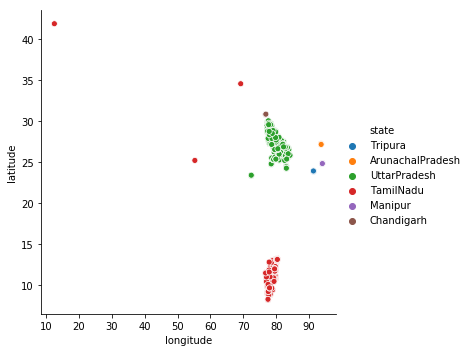

In [53]:
sns.relplot(data=geo_data, y='latitude', x='longitude', hue='state')
plt.show()

#### Evident from above plot ther are few outliers for TamilNadu and UttarPradesh

In [54]:
tn_out_data=event_data.loc[(event_data['state']=='TamilNadu') & (event_data['longitude']<75) & (event_data['latitude']>20),['longitude','latitude','city','state']].drop_duplicates()
tn_out_data

,longitude,latitude,city,state
228381,55.270802,25.204800,Chennai,TamilNadu
263525,12.567400,41.871899,Chennai,TamilNadu
350138,69.207497,34.555302,Chennai,TamilNadu


In [55]:
up_out_data=event_data.loc[(event_data['state']=='UttarPradesh') & (event_data['longitude']<73) & (event_data['latitude']<25),['longitude','latitude','city','state']].drop_duplicates()
up_out_data

,longitude,latitude,city,state
5133,72.419670,23.397142,Kadi,UttarPradesh
18661,72.389008,23.368422,Kadi,UttarPradesh
26511,72.425514,23.330158,Kadi,UttarPradesh
31006,72.365273,23.375839,Kadi,UttarPradesh
37267,72.426834,23.346064,Kadi,UttarPradesh
43455,72.393517,23.338049,Kadi,UttarPradesh
48571,72.367592,23.389080,Kadi,UttarPradesh
52891,72.394669,23.327080,Kadi,UttarPradesh
61948,72.356247,23.390455,Kadi,UttarPradesh
64228,72.420052,23.334427,Kadi,UttarPradesh


In [56]:
geo_out_data=tn_out_data.append(up_out_data)
geo_out_data

,longitude,latitude,city,state
228381,55.270802,25.204800,Chennai,TamilNadu
263525,12.567400,41.871899,Chennai,TamilNadu
350138,69.207497,34.555302,Chennai,TamilNadu
5133,72.419670,23.397142,Kadi,UttarPradesh
18661,72.389008,23.368422,Kadi,UttarPradesh
26511,72.425514,23.330158,Kadi,UttarPradesh
31006,72.365273,23.375839,Kadi,UttarPradesh
37267,72.426834,23.346064,Kadi,UttarPradesh
43455,72.393517,23.338049,Kadi,UttarPradesh
48571,72.367592,23.389080,Kadi,UttarPradesh


In [57]:
locations = geo_out_data[['latitude','longitude']].drop_duplicates()
print(locations[locations['latitude'].isnull()].shape)
locationlist= locations.values.tolist()

(0, 2)


In [58]:
len(locationlist)

28

In [59]:
import folium

map = folium.Map(location=locationlist[27], zoom_start=5)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)

In [60]:
map

#### Eveident from above plot, these geo locations are out of sync with city and state information. Lets drop these events.

In [61]:
event_data=event_data.drop(event_data[(event_data['state']=='TamilNadu') & (event_data['longitude']<75) & (event_data['latitude']>20)].index)

In [62]:
event_data=event_data.drop(event_data[(event_data['state']=='UttarPradesh') & (event_data['longitude']<73) & (event_data['latitude']<25)].index)

In [63]:
geo_data=event_data[['longitude','latitude','city','state']].drop_duplicates()

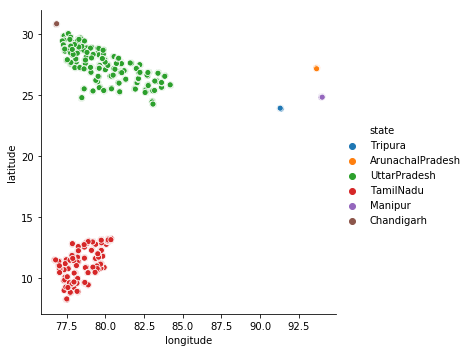

In [64]:
sns.relplot(data=geo_data, y='latitude', x='longitude', hue='state')
plt.show()

#### Data clean up is done. Lets confirm

In [65]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533459 entries, 0 to 534414
Data columns (total 7 columns):
event_id     533459 non-null int64
device_id    533459 non-null object
timestamp    533459 non-null object
longitude    533459 non-null float64
latitude     533459 non-null float64
city         533459 non-null object
state        533459 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 32.6+ MB


In [66]:
phone_brand_dict={}
device_model_dict={}

In [67]:
phone_brands=phone_brand_device_model['phone_brand'].unique()
len(phone_brands)
phone_brands


array(['三星', '酷比', '小米', '魅族', 'vivo', '华为', 'OPPO', '优米', '梦米', 'HTC',
       'LG', '奇酷', '天语', '乐视', '朵唯', '努比亚', '黑米', '酷派', '美图', '摩托罗拉',
       'TCL', '波导', '海信', '唯米', '华硕', '米歌', '酷比魔方', '锤子', 'SUGAR', '中国移动',
       '爱派尔', '联想 ', '果米', '欧博信', '邦华', '诺基亚', 'LOGO', '贝尔丰', '斐讯', '谷歌',
       '语信', '奥克斯', '纽曼', '富可视', '一加', '智镁', '艾优尼', '优购', '尼比鲁', '摩乐',
       'ZUK', '青橙', '夏新', '聆韵', '康佳', '长虹', '诺亚信', nan, '海尔', '台电',
       'Lovme', '小杨树', '德赛', '百立丰', '易派', '至尊宝', '惠普', '大可乐', '飞秒', '唯比',
       '米奇', '金星数码', '糯米', '大Q', '基伍', '欧奇', '广信', '百加', '神舟', '维图', '先锋',
       '青葱'], dtype=object)

In [117]:
phone_models=phone_brand_device_model['device_model'].unique()
len(phone_models)
phone_models


array(['Galaxy Grand 2', 'M1', '小米note', 'A788t', '魅蓝Note 2',
       'Galaxy Mega 5.8', 'Galaxy Win', 'X3T', 'MT1-U06', 'N1T', 'MX3',
       'X3V', 'A708t', 'MI 2S', 'Galaxy S4', 'Find 7', 'UIMI3', '魅蓝NOTE',
       'Galaxy Grand DUOS', 'P6', 'X6 D', '荣耀3X畅玩版', 'Desire 816', '1107',
       '红米note', 'X5L', 'G3', 'Galaxy Note 2', '青春版', 'Y17W', 'Ascend P7',
       'A199', 'Desire 820', 'Galaxy Note 4', 'Y321C', 'T621', 'S820',
       '小米4C', 'Xplay3S', 'A798t', '红米Note3', '超级手机1', '荣耀6', 'S2y',
       '荣耀3C', 'MI 3', 'R7', 'R1S', 'U9508', 'Galaxy S5', '红米2', 'Y623',
       '红米', 'MI 4', 'A65', 'Galaxy S6', 'One', 'Galaxy S6 Edge+', 'X5SL',
       'ELIFE E6 mini', 'MX4', 'Galaxy S6 Edge', 'Mate 7', 'Galaxy S3',
       'X3L', 'Galaxy A8', '黄金斗士A8', '3007', 'MX2', 'G620-L75',
       'Galaxy A5', 'MI One Plus', '荣耀6 Plus', '红米note增强版',
       'Galaxy Grand Prime', '荣耀畅玩4X', 'Y320T', 'M8St', 'Z7 Max',
       'Z5 Mini', 'A320t', 'Galaxy E7', 'Ascend P6', 'One S', 'MI 1',
       '魅蓝', 'R7s', 'M

In [121]:
from translate import translator
import time
for brand in phone_brands:
    
    if  brand not in phone_brand_dict:
        print(brand)
        time.sleep(1)
        try:
            data=translator('zh-CN','en', brand)
            if ((len(data)>0) & (len(data[0])>0) & (len(data[0][0])>0)):
                print(data[0][0][0])
                phone_brand_dict[brand]=data[0][0][0]        

        except:
            print("An exception occurred")


三星
An exception occurred
酷比
An exception occurred
小米
An exception occurred
魅族
An exception occurred
vivo
An exception occurred
华为
An exception occurred
OPPO
An exception occurred
优米
An exception occurred
梦米
An exception occurred
HTC


KeyboardInterrupt: 

In [131]:
phone_brand_dict

{}

In [132]:
# Google API is throwing error, fall back to known translations

if len(phone_brand_dict)==0:
    phone_brand_dict['华为']='Huawei'
    phone_brand_dict['小米']='Xiaomi'
    phone_brand_dict['三星']='Samsung'
    phone_brand_dict['魅族']='Meizu'
    phone_brand_dict['酷派']='Coolpad'
    phone_brand_dict['乐视']='LeEco'
    phone_brand_dict['联想 ']='Lenovo'


In [71]:
for model in phone_models:
    
    if  model not in device_model_dict:
        print(model)
        try:
            data=translator('zh-CN','en', model)
            if ((len(data)>0) & (len(data[0])>0) & (len(data[0][0])>0)):
                print(data[0][0][0])
                device_model_dict[model]=data[0][0][0]        
        except:
            print("An exception occurred")
        


Galaxy Grand 2
An exception occurred
M1
An exception occurred
小米note
An exception occurred
A788t
An exception occurred
魅蓝Note 2
An exception occurred
Galaxy Mega 5.8
An exception occurred
Galaxy Win
An exception occurred
X3T
An exception occurred
MT1-U06
An exception occurred
N1T
An exception occurred
MX3
An exception occurred
X3V
An exception occurred
A708t
An exception occurred
MI 2S
An exception occurred
Galaxy S4
An exception occurred
Find 7
An exception occurred
UIMI3
An exception occurred
魅蓝NOTE
An exception occurred
Galaxy Grand DUOS
An exception occurred
P6
An exception occurred
X6 D
An exception occurred
荣耀3X畅玩版
An exception occurred
Desire 816
An exception occurred
1107
An exception occurred
红米note
An exception occurred
X5L
An exception occurred
G3
An exception occurred
Galaxy Note 2
An exception occurred
青春版
An exception occurred
Y17W
An exception occurred
Ascend P7
An exception occurred
A199
An exception occurred
Desire 820
An exception occurred
Galaxy Note 4
An exception o

An exception occurred
V95
An exception occurred
S920
An exception occurred
R1C
An exception occurred
8730L
An exception occurred
Touch 2
An exception occurred
A678t
An exception occurred
荣耀畅玩5
An exception occurred
W2014
An exception occurred
A890e
An exception occurred
Mate 2
An exception occurred
A880
An exception occurred
荣耀X2
An exception occurred
M812C
An exception occurred
8150
An exception occurred
荣耀+
An exception occurred
A805e
An exception occurred
荣耀3C畅玩版
An exception occurred
XL
An exception occurred
荣耀3X
An exception occurred
A11
An exception occurred
黄金斗士青春版
An exception occurred
Y29L
An exception occurred
F103
An exception occurred
ME7510KG
An exception occurred
R2017
An exception occurred
N1 max
An exception occurred
R8205
An exception occurred
8729
An exception occurred
Grand X Quad
An exception occurred
S898t
An exception occurred
Galaxy S2
An exception occurred
Xperia T2 Ultra
An exception occurred
乐玩
An exception occurred
Ascend G6
An exception occurred
魅蓝metal
An e

An exception occurred
S880
An exception occurred
G730-L075
An exception occurred
Z1
An exception occurred
T528t
An exception occurred
M9
An exception occurred
S720i
An exception occurred
P780
An exception occurred
ZenFone Max
An exception occurred
A355e
An exception occurred
Xperia TX
An exception occurred
TL1000
An exception occurred
Galaxy Core Mini
An exception occurred
M030
An exception occurred
T528w
An exception occurred
U980
An exception occurred
Mate 7 青春版
An exception occurred
N1-Y
An exception occurred
R830
An exception occurred
M4
An exception occurred
A368t
An exception occurred
T29
An exception occurred
A390t
An exception occurred
G660-L075
An exception occurred
T2
An exception occurred
X817
An exception occurred
A378t
An exception occurred
Y560-CL00
An exception occurred
A820e
An exception occurred
7269
An exception occurred
A800
An exception occurred
5879
An exception occurred
黄金斗士Note8
An exception occurred
S850t
An exception occurred
Galaxy Tab 3 Lite T110
An exception

An exception occurred
ZenFone 5
An exception occurred
GN152
An exception occurred
Y320
An exception occurred
i600
An exception occurred
VT868
An exception occurred
Xperia Z1 炫彩版
An exception occurred
W800
An exception occurred
P880
An exception occurred
Galaxy Fame
An exception occurred
Galaxy Infinite
An exception occurred
S850
An exception occurred
K80
An exception occurred
5930
An exception occurred
U795+
An exception occurred
U939
An exception occurred
One M9
An exception occurred
GT-I8160
An exception occurred
A3300-T
An exception occurred
XT1060
An exception occurred
EG936D
An exception occurred
Galaxy Tab 2 P3100
An exception occurred
metal 标准版
An exception occurred
7268
An exception occurred
8702D
An exception occurred
GN150
An exception occurred
红米3
An exception occurred
M3S
An exception occurred
Blade S6
An exception occurred
Sensation XE with Beats Audio Z715e
An exception occurred
Q7
An exception occurred
8717
An exception occurred
Desire S
An exception occurred
天鉴T1
An exc

In [124]:
device_model_dict

{}

In [133]:
phone_brand_dict

{'华为': 'Huawei',
 '小米': 'Xiaomi',
 '三星': 'Samsung',
 '魅族': 'Meizu',
 '酷派': 'Coolpad',
 '乐视': 'LeEco',
 '联想 ': 'Lenovo'}

In [139]:
# repalce vlaues using dict

phone_brand_device_model['phone_brand']=phone_brand_device_model['phone_brand'].map(phone_brand_dict).fillna(phone_brand_device_model['phone_brand'])

In [140]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,-2638302274530537957,Samsung,Galaxy Grand 2
1,2687021466923970058,酷比,M1
2,-5080051514408049802,Xiaomi,小米note
3,-4909264578655508813,Samsung,A788t
4,-965141125520486405,Meizu,魅蓝Note 2


    ### Distribution of Users(device_id) across States.

In [169]:
event_data.groupby(['city','state']).device_id.nunique().reset_index()

,city,state,device_id
0,Agartala,Tripura,36
1,Agra,UttarPradesh,36
2,Alandur,TamilNadu,33
3,Aligarh,UttarPradesh,28
4,Allahabad,UttarPradesh,29
5,Ambattur,TamilNadu,28
6,Ambur,TamilNadu,49
7,Amroha,UttarPradesh,23
8,Aonla,UttarPradesh,41
9,Arakonam,TamilNadu,33


In [210]:
state_device_data=event_data.groupby('state').device_id.nunique().reset_index().sort_values(['device_id'], ascending=False)

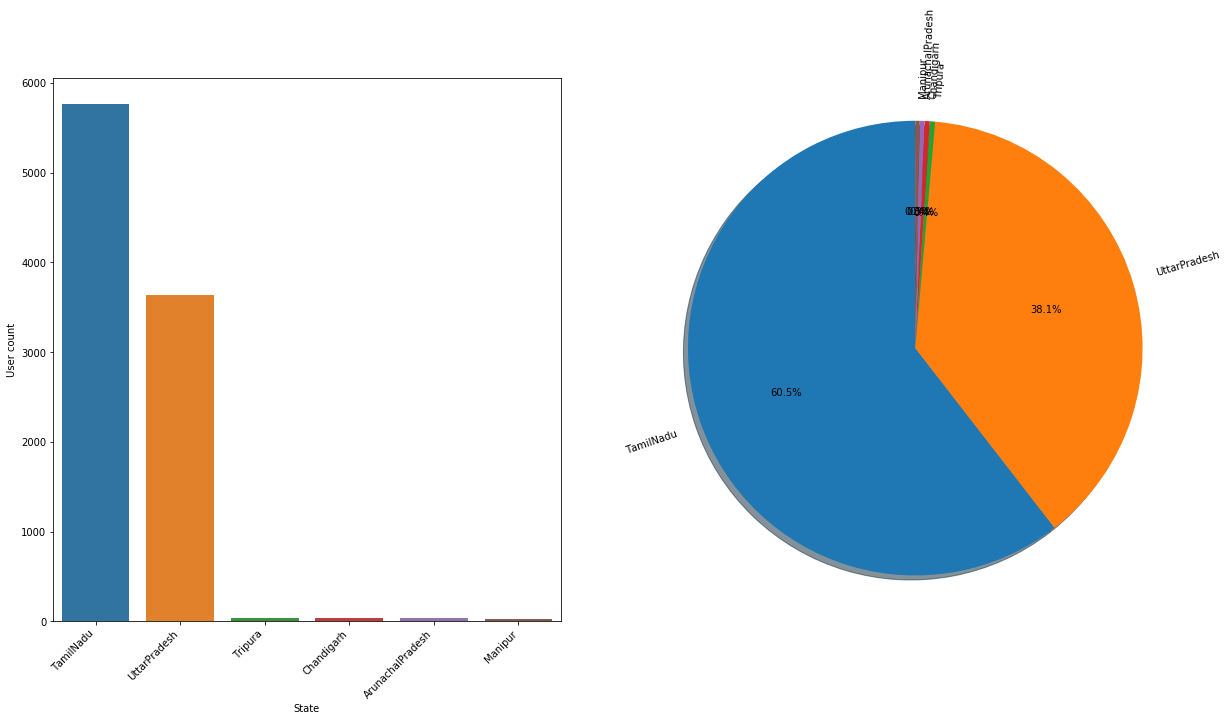

In [211]:
fig, ax = plt.subplots(1,2,figsize = (20,10))

sns.barplot(x="state", y="device_id", data=state_device_data,ax=ax[0])
ax[0].set(xlabel='State', ylabel='User count')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[1].pie(state_device_data['device_id'],  labels=state_device_data['state'], autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels=True )
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')


#plt.title("Distribution of Users across States")
plt.show()


### Distribution of Users across Phone Brands

In [201]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,-2638302274530537957,Samsung,Galaxy Grand 2
1,2687021466923970058,酷比,M1
2,-5080051514408049802,Xiaomi,小米note
3,-4909264578655508813,Samsung,A788t
4,-965141125520486405,Meizu,魅蓝Note 2


In [208]:
brand_device_data=phone_brand_device_model.groupby('phone_brand').device_id.nunique().reset_index().sort_values(['device_id'], ascending=False).head(10)

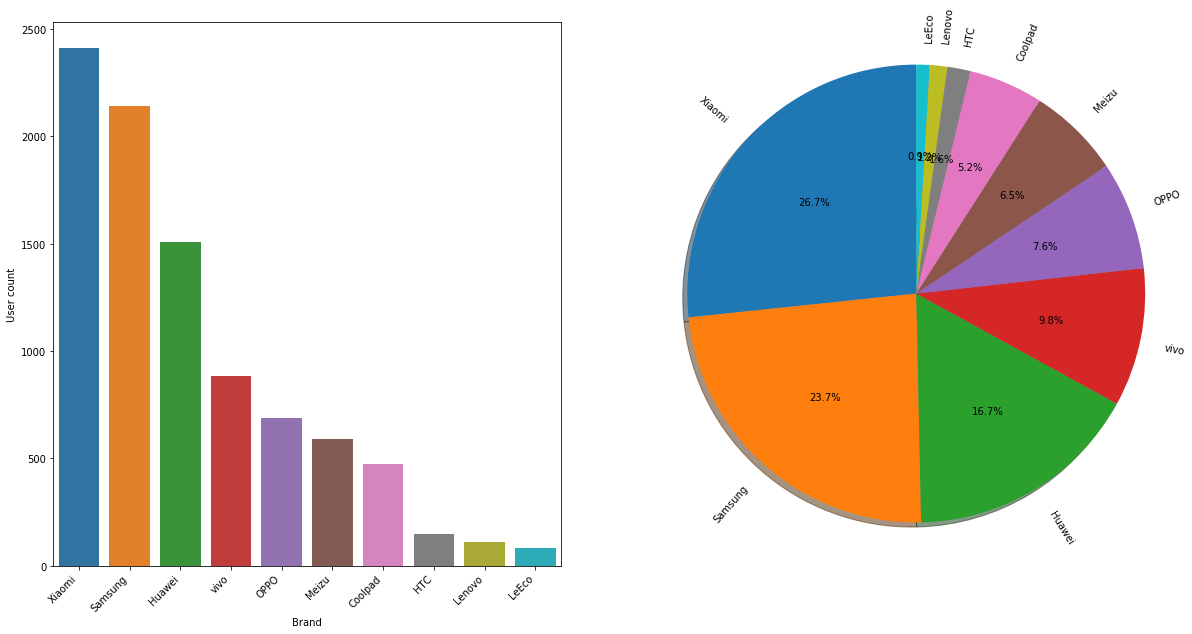

In [209]:
fig1, ax1 = plt.subplots(1,2,figsize = (20,10))

sns.barplot(x="phone_brand", y="device_id", data=brand_device_data,ax=ax1[0])
ax1[0].set(xlabel='Brand', ylabel='User count')
ax1[0].set_xticklabels(ax1[0].get_xticklabels(), rotation=45, horizontalalignment='right')

ax1[1].pie(brand_device_data['device_id'],  labels=brand_device_data['phone_brand'], autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels=True )
ax1[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1[1].set_xticklabels(ax1[1].get_xticklabels(), rotation=45, horizontalalignment='right')


#plt.title("Distribution of Users across States")
plt.show()
